![Logo das Instituições](../images/logos_instituicoes_colorido.png)

<h1 style="text-align:center; font-weight:bold;">Abordagem Baseada em Aprendizado de Máquina para o Diagnóstico de Doenças Eritemato-Escamosas</h1>

---

## Descrição do Projeto

Este notebook é o projeto final da disciplina Aprendizado de Máquina, cursada no segundo semestre do Bacharelado em Ciência e Tecnologia da Ilum Escola de Ciência. O objetivo dessa aplicação é aplicar e aprofundar os conhecimentos adquiridos ao longo do semestre em um projeto prático, apresentado em uma reunião com o professor responsável pela disciplina.

## Índice

1. Introdução

2. Informações do Conjunto de Dados  

3. Coleta de Dados

4. Tratamento de Dados 

5. Divisão Treino e Teste 

6. *Permutation Importance*

7. Modelo *Baseline*   

8. Modelo *K-Neighbors Classifier* 

9. Modelo *Decision Tree Classifier*

10. Modelo *Random Forest Classifier*

11. Modelo *Support Vector Machine*

12. Modelo *Voting Feature Intervals* 

13. Conclusão 

14. Contribuidores  

15. Professor Responsável

16. Referências


## 1. Introdução <a id="introducao"></a>

O diagnóstico diferencial das doenças eritemato-escamosas é um desafio na dermatologia, pois esse grupo de enfermidades compartilham características clínicas e histopatológicas muito semelhantes, como eritema e descamação. Essa semelhança dificulta a distinção entre elas, mesmo com o uso de biópsias.

Neste projeto, propomos uma abordagem de aprendizado de máquina para auxiliar nesse diagnóstico, utilizando o dataset *Dermatology* (ILTER; GÜVENIR, 1998) do *UCI Machine Learning Repository*. Foram aplicados três modelos de classificação: um modelo *baseline*, o *K-Neighbors Classifier* (KNN) — aprendido durante o curso — e o *Voting Feature Intervals* (VFI), modelo de referência na literatura para esse problema.

Após a otimização e avaliação de cada modelo, com base em métricas de desempenho apresentadas em relatórios de classificação, buscamos identificar o algoritmo com melhor capacidade preditiva, demonstrando o potencial do aprendizado de máquina como ferramenta de apoio ao diagnóstico médico.

## 2. Informações do Dataset

O dataset *Dermatology* (ILTER; GÜVENIR, 1998) foi desenvolvido para apoiar estudos sobre o diagnóstico diferencial de doenças eritemato-escamosas, reunindo informações clínicas e histopatológicas de pacientes com $6$ diferentes condições dermatológicas (**psoríase**, **dermatite seborreica**, **líquen plano**, **pitiríase rósea**, **dermatite crônica** e **pitiríase rubra pilar**).

O objetivo do conjunto de dados é identificar a doença de cada paciente, que constitui o *target*. No dataset, essas seis doenças foram codificadas numericamente de $1$ a $6$, sendo: 

- $1$: Psoríase
- $2$: Dermatite Seborreica
- $3$: Líquen Plano
- $4$: Pitiríase Rósea
- $5$: Dermatite Crônica
- $6$: Pitiríase Rubra Pilar

O banco de dados é multivariado, composto por $366$ instâncias e $34$ atributos, dos quais $33$ são de dados qunatitativos discretos e $1$ é qualitativo nominal.

Os pacientes foram inicialmente avaliados clinicamente, com base em $12$ características observáveis, como eritema, descamação e espessamento da pele. Em seguida, foram analisadas $22$ características histopatológicas, obtidas a partir de amostras de pele examinadas ao microscópio.

As variáveis histopatológicas e clínicas foram quantificadas em uma escala ordinal de $0$ a $3$, na qual:

- $0$ indica ausência da característica;
- $1$ e $2$ representam graus intermediários;
- $3$ indica o grau máximo de manifestação.

Além disso, o atributo história familiar assume o valor $1$ quando há registro da doença em familiares e $0$ caso contrário. O atributo idade representa a idade do paciente.

Os nomes e identificações pessoais foram removidos do conjunto de dados para preservar a privacidade dos participantes.


## 3. Coleta de Dados

Importa-se o dataset *Dermatology* do *UCI Machine Learning Repository* usando a biblioteca `ucimlrepo`.
As variáveis são divididas em:

- `X`: atributos;

- `y`: target (diagnóstico).

In [ ]:
from ucimlrepo import fetch_ucirepo 

dermatology = fetch_ucirepo(id=33) 
  
X = dermatology.data.features 
y = dermatology.data.targets['class']
  
# Informação das variáveis
print(dermatology.variables) 

                                           name     role     type demographic  \
0                                      erythema  Feature  Integer        None   
1                                       scaling  Feature  Integer        None   
2                              definite-borders  Feature  Integer        None   
3                                       itching  Feature  Integer        None   
4                            koebner phenomenon  Feature  Integer        None   
5                             polygonal papules  Feature  Integer        None   
6                            follicular papules  Feature  Integer        None   
7                      oral-mucosal involvement  Feature  Integer        None   
8                        knee elbow involvement  Feature  Integer        None   
9                             scalp involvement  Feature  Integer        None   
10                               family history  Feature   Binary        None   
11                         m

## 4. Tratamento de Dados

Utiliza-se o `KNNImputer` para preencher valores ausentes, substituindo-os com base nos valores médios dos vizinhos mais próximos (no caso, $5$ vizinhos), preservando a coerência das amostras sem distorcer a distribuição original dos dados.

Após a imputação, os dados são organizados novamente em um DataFrame do `pandas`, mantendo os nomes das colunas originais.

In [ ]:
from sklearn.impute import KNNImputer
import pandas as pd 

imputer = KNNImputer(n_neighbors=5)
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)


## 5. Divisão Treino e Teste

Nesta etapa, o conjunto de dados é dividido em duas partes:

- Treino ($90\%$): usado para ajustar os modelos e encontrar os melhores parâmetros;

- Teste ($10\%$): usado para avaliar o desempenho dos modelos em dados nunca vistos.

A divisão é feita com a função `train_test_split`, utilizando uma semente aleatória fixa (`SEMENTE_ALEATORIA = 42`) para garantir reprodutibilidade dos resultados.

In [ ]:
from sklearn.model_selection import train_test_split

SEMENTE_ALEATORIA = 42
TAMANHO_TESTE = 0.1

X_treino, X_teste, y_treino, y_teste = train_test_split(
    X, y, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA
)

A variável `ordem_labels` é criada para armazenar a ordem das classes do *target*, o que será útil na geração dos relatórios de classificação e na interpretação dos resultados.

In [ ]:
ordem_labels = sorted(y.unique())

## 6. Permutation Importance

Utilizamos, nesse projeto, o método de *Permutation Importance* como ferramenta de explicabilidade dos modelos que implementamos. Esse método foi utilizado para identificar quais variáveis clínicas e histopalógicas mais influenciaram as previsões dos classificadores, o que permitiu uma interpretação mais transparente dos resultados obtidos. O método baseia-se em avaliar a variação no desempenho do modelo quando os valores de uma determinada varíavel são aleatoriamente embaralhados no conjunto de teste, o que quebra sua relação com o nosso target. Caso as métricas de interesse diminuam significativamente após o embaralhamento, conclui-se que aquela variável exerce um papel forte nas decisões do modelo.

A aplicação do *Permutation Importance* no `scikit-learn` é feita por meio da função `permutation_importance`, disponível no módulo `sklearn.inspection`. O método recebe como parâmetros o modelo já treinado, os dados de teste e o vetor de rótulos verdadeiros, além da métrica de avaliação desejada. Para garantir resultados estáveis, define-se um número de repetições (`n_repeats`) e uma semente aleatória (`random_state`). Internamente, o algoritmo embaralha uma feature por vez no conjunto de teste, recalcula o desempenho do modelo e registra a variação em relação ao desempenho original (baseline). A média das quedas obtidas nas repetições indica o grau de importância de cada variável. O resultado é armazenado nos vetores `importances_mean` e `importances_std`, que representam, respectivamente, a média e o desvio-padrão da queda de desempenho para cada feature. Esses valores podem então ser organizados e visualizados em um gráfico de barras, destacando as variáveis mais relevantes para o modelo.

### 6.1 Funcionamento Neste Notebook

A função recebe como principais parâmetros o modelo estimador (`estimator`), os dados de entrada e saída (`X` e `y`), a métrica de avaliação (`scoring`, como `accuracy`, `f1_macro`, `r2` etc.), o número de repetições de embaralhamento (`n_repeats`), a semente aleatória (`random_state`) e o número de núcleos de CPU usados em paralelo (`n_jobs`, sendo -1 para usar todos). Após o cálculo, o código organiza os resultados em um DataFrame com a importância média e o desvio padrão de cada variável, ordenando-as da mais para a menos relevante. Por fim, plota-se um gráfico de barras horizontais que mostra visualmente a queda média no desempenho causada pela permutação de cada variável, permitindo identificar quais atributos mais contribuem para as previsões do modelo, independentemente do algoritmo utilizado.

## 7. Modelo *Baseline*

Antes de aplicar modelos mais complexos, é importante estabelecer um modelo de referência (*baseline*). Esse modelo serve como um ponto de comparação, permitindo avaliar se os classificadores mais sofisticados realmente trazem ganhos de desempenho.

Aqui, utilizamos o `DummyClassifier`, que realiza previsões simples (como sempre escolher a classe mais frequente). Embora seja um modelo sem aprendizado real, ele fornece uma linha de base mínima para avaliar a eficácia dos demais algoritmos.

### 7.1. Criação do Modelo

Nesta etapa, o modelo *baseline* `DummyClassifier` é treinado com os dados de treino (`X_treino` e `y_treino`), aprendendo apenas a frequência das classes, sem considerar os atributos do conjunto.

In [ ]:
from sklearn.dummy import DummyClassifier

modelo_baseline = DummyClassifier()

modelo_baseline.fit(X_treino, y_treino)

,strategy,'prior'
,random_state,None
,constant,None


### 7.2. Avaliação do Modelo

Para avaliar o desempenho do modelo *baseline*, utilizamos duas ferramentas principais:

- **Matriz de confusão**: mostra o número de acertos e erros em cada classe, facilitando a visualização do padrão de previsões incorretas.

- **Relatório de classificação**: apresenta métricas como *precision*, *recall* e *f1-score* para cada classe.

Essas métricas permitirão comparar, nas próximas seções, o quanto os modelos mais complexos de aprendizado de máquina superam o desempenho desse modelo referência.

**Matriz de Confusão**

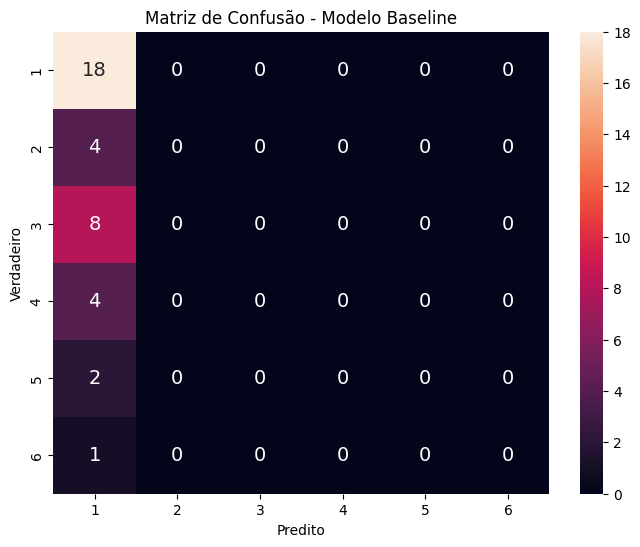

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

y_verdadeiro = y_teste
y_previsao = modelo_baseline.predict(X_teste)

matriz_conf = confusion_matrix(y_verdadeiro, y_previsao, labels=ordem_labels)
df_conf = pd.DataFrame(matriz_conf, ordem_labels, ordem_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(df_conf, annot=True, fmt='d', annot_kws={"size": 14})
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.title("Matriz de Confusão - Modelo Baseline")
plt.show()

**Relatório de Classificação**

In [ ]:
from sklearn.metrics import classification_report

print("Relatório de Classificação - Modelo Baseline")
print()
print(classification_report(y_teste, y_previsao, target_names=[str(c) for c in ordem_labels], zero_division=0))

Relatório de Classificação - Modelo Baseline

              precision    recall  f1-score   support

           1       0.49      1.00      0.65        18
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         1

    accuracy                           0.49        37
   macro avg       0.08      0.17      0.11        37
weighted avg       0.24      0.49      0.32        37



### 7.3. Features mais importantes do Baseline

O modelo Baseline (DummyClassifier), por não ser baseado em nenhum tipo de aprendizado e realizar previsões apenas com base na classe mais frequente (moda dos valores alvo), não utiliza nenhuma das variáveis de entrada. Portanto, não faz sentido aplicar o método de Permutation Importance nesse modelo, já que ele não depende de nenhuma feature para realizar suas previsões.

## 8. Modelo *K-Neighbors Classifier*

O algoritmo *K-Nearest Neighbors* (KNN) é um dos classificadores mais intuitivos e foi estudado ao longo da disciplina. Ele classifica uma amostra com base nos rótulos das amostras mais próximas no espaço de atributos, medindo a similaridade por meio de distâncias.

Nesta seção, aplicamos, otimizamos e avaliamos o KNN, explorando diferentes combinações de parâmetros para alcançar o melhor desempenho.

### 8.1. Criação do Modelo

Nesta parte, é definida uma função de criação do modelo (`cria_modelo`) para ser usada na otimização com o `optuna`.
A função permite ajustar automaticamente parâmetros importantes do KNN, como:

- `n_neighbors`: número de vizinhos considerados;

- `weights`: tipo de ponderação das distâncias;

- `p`: tipo de métrica de distância ($1$: Manhattan, $2$: Euclidiana).

Também são testadas duas opções de pré-processamento:

- Normalização dos dados (`StandardScaler`), para evitar que atributos em escalas diferentes influenciem o cálculo das distâncias;

- Redução de dimensionalidade com PCA, que pode melhorar o desempenho e reduzir ruído.

O modelo é estruturado em um *pipeline*, que combina essas etapas conforme definido pelos parâmetros escolhidos.

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

def cria_modelo(trial):
    """Cria instância do KNN com opções de normalização e PCA (para Optuna)."""
    
    parametros = {
        "n_neighbors": trial.suggest_int("n_neighbors", 1, 50),
        "weights": trial.suggest_categorical("weights", ["uniform", "distance"]),
        "p": trial.suggest_float("p", 1, 2),
        "n_jobs": -1,
    }
    
    normalizar = trial.suggest_categorical("normalizar", [True, False])
    usar_pca = trial.suggest_categorical("usar_pca", [True, False])
    
    # Se PCA for usado, define número de componentes
    if usar_pca:
        num_componentes = trial.suggest_int("n_componentes", 1, min(X_treino.shape[1], 20))
    else:
        num_componentes = None
    
    # Monta pipeline dinamicamente
    etapas = []
    if normalizar:
        etapas.append(("scaler", StandardScaler()))
    if usar_pca:
        etapas.append(("pca", PCA(n_components=num_componentes)))
    etapas.append(("knn", KNeighborsClassifier(**parametros)))
    
    modelo = make_pipeline(*[etapa[1] for etapa in etapas])
    
    return modelo

### 8.2. Otimização

Aqui, aplicamos o `optuna`, uma biblioteca feita para otimização de hiperparâmetros.

A função `otimizar_knn` realiza um processo iterativo de busca, avaliando múltiplas combinações de parâmetros do KNN com validação cruzada estratificada ($5$ *folds*).

O objetivo é maximizar a acurácia média, garantindo que o modelo final seja o mais eficiente possível.

Após o estudo, o notebook exibe os melhores parâmetros encontrados, que são então utilizados para reconstruir e treinar o modelo final otimizado (`modelo_knn_otimizado`).

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
import optuna

def otimizar_knn(X, y, n_trials=30):
    """Usa Optuna para encontrar os melhores hiperparâmetros do KNN."""
    
    def objetivo(trial):
        modelo = cria_modelo(trial)
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEMENTE_ALEATORIA)
        scores = cross_val_score(modelo, X, y, cv=cv, scoring="accuracy")
        return scores.mean()
    
    estudo = optuna.create_study(direction="maximize")
    estudo.optimize(objetivo, n_trials=n_trials)
    
    print("Melhores parâmetros:", estudo.best_params)
    
    return estudo.best_params

melhores_params = otimizar_knn(X_treino, y_treino, n_trials=30)

[I 2025-11-03 23:19:26,028] A new study created in memory with name: no-name-c1773e22-d5b4-4bd2-bb72-3e59f8ede9aa
[I 2025-11-03 23:19:26,185] Trial 0 finished with value: 0.914778554778555 and parameters: {'n_neighbors': 2, 'weights': 'distance', 'p': 1.5697178727168626, 'normalizar': True, 'usar_pca': True, 'n_componentes': 12}. Best is trial 0 with value: 0.914778554778555.
[I 2025-11-03 23:19:29,448] Trial 1 finished with value: 0.9543589743589743 and parameters: {'n_neighbors': 28, 'weights': 'uniform', 'p': 1.285412449626517, 'normalizar': True, 'usar_pca': False}. Best is trial 1 with value: 0.9543589743589743.
[I 2025-11-03 23:19:29,592] Trial 2 finished with value: 0.8479254079254079 and parameters: {'n_neighbors': 12, 'weights': 'distance', 'p': 1.8949622207065877, 'normalizar': False, 'usar_pca': False}. Best is trial 1 with value: 0.9543589743589743.
[I 2025-11-03 23:19:29,740] Trial 3 finished with value: 0.8145920745920746 and parameters: {'n_neighbors': 39, 'weights': 'un

Melhores parâmetros: {'n_neighbors': 8, 'weights': 'uniform', 'p': 1.430446994382448, 'normalizar': True, 'usar_pca': False}


**Reconstrói o modelo final com os melhores parâmetros**

In [ ]:
# Lê os parâmetros do estudo
p = melhores_params["p"]
n_neighbors = melhores_params["n_neighbors"]
weights = melhores_params["weights"]
normalizar = melhores_params["normalizar"]
usar_pca = melhores_params["usar_pca"]
num_componentes = melhores_params.get("n_componentes", None)

# Monta pipeline final
etapas_finais = []
if normalizar:
    etapas_finais.append(("scaler", StandardScaler()))
if usar_pca and num_componentes is not None:
    etapas_finais.append(("pca", PCA(n_components=num_componentes)))
etapas_finais.append(("knn", KNeighborsClassifier(
    n_neighbors=n_neighbors,
    weights=weights,
    p=p,
    n_jobs=-1
)))

modelo_knn_otimizado = make_pipeline(*[e[1] for e in etapas_finais])
modelo_knn_otimizado.fit(X_treino, y_treino)

,steps,"[('standardscaler', ...), ('kneighborsclassifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_neighbors,8
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30


### 8.3. Avaliação do Modelo

Após o treinamento do modelo otimizado, avaliamos seu desempenho:

**Matriz de Confusão**

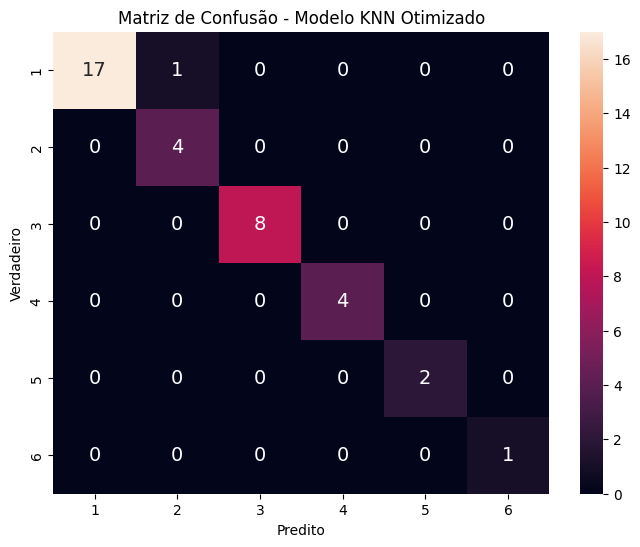

In [ ]:
y_pred = modelo_knn_otimizado.predict(X_teste)

# ordem_labels = sorted(y.unique())
matriz_conf = confusion_matrix(y_teste, y_pred, labels=ordem_labels)
df_conf = pd.DataFrame(matriz_conf, index=ordem_labels, columns=ordem_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(df_conf, annot=True, fmt='d', annot_kws={"size": 14})
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.title("Matriz de Confusão - Modelo KNN Otimizado")
plt.show()

**Relatório de Classificação**

In [ ]:
print("Relatório de Classificação - Modelo KNN Otimizado")
print()
print(classification_report(y_teste, y_pred, target_names=[str(c) for c in ordem_labels]))

Relatório de Classificação - Modelo KNN Otimizado

              precision    recall  f1-score   support

           1       1.00      0.94      0.97        18
           2       0.80      1.00      0.89         4
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         1

    accuracy                           0.97        37
   macro avg       0.97      0.99      0.98        37
weighted avg       0.98      0.97      0.97        37



### 8.4. Atributos Mais Importantes do *KNN*

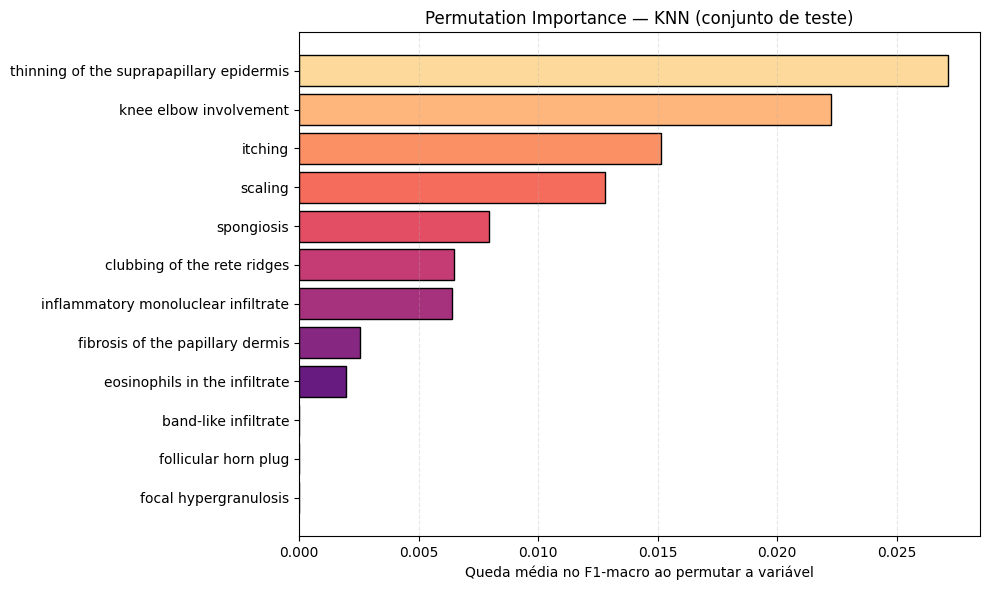

In [ ]:
from sklearn.inspection import permutation_importance
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1) Cálculo da permutation importance no conjunto de teste
pi = permutation_importance(
    estimator=modelo_knn_otimizado,
    X=X_teste,
    y=y_teste,
    scoring="f1_macro",
    n_repeats=30,
    random_state=777666,
    n_jobs=-1
)

# 2) Criação do DataFrame e ordena por importância média
df = pd.DataFrame({
    "Variável": X.columns,
    "Importância Média": pi.importances_mean
}).sort_values("Importância Média", ascending=False)

# 3) Seleção das 12 mais relevantes
top = df.head(12).iloc[::-1].reset_index(drop=True)

# 4) Plotagem da permutation importance

fig, ax = plt.subplots(figsize=(10, 6))
y = np.arange(len(top))


colors = sns.color_palette("magma", len(top))

ax.barh(y, top["Importância Média"], color=colors, edgecolor="black")
ax.set_yticks(y)
ax.set_yticklabels(top["Variável"])

ax.set_xlabel("Queda média no F1-macro ao permutar a variável")
ax.set_title("Permutation Importance — KNN (conjunto de teste)")
ax.grid(axis="x", linestyle="--", alpha=0.3)

plt.tight_layout()
plt.show()

O gráfico mostra os resultados do cálculo de Permutation Importance para o modelo KNN aplicado ao conjunto de teste, revelando o impacto médio que a permutação de cada variável exerce sobre a métrica *F1-macro*. Observa-se que `fibrosis of the papillary dermis` é a variável mais influente, apresentando a maior queda de desempenho quando seus valores são embaralhados, o que indica que o modelo depende fortemente dessa característica para realizar suas previsões. Em seguida, `thinning of the suprapapillary epidermis` e `elongation of the rete ridges` também exercem influência relevante, sugerindo que aspectos estruturais da epiderme e derme são importantes para a classificação. As demais variáveis, como `scaling`, `erythema` e `spongiosis`, possuem efeito moderado, enquanto atributos como `eosinophils in the infiltrate` e `focal hypergranulosis` apresentam impacto mínimo, indicando baixa contribuição para o desempenho do modelo.

## 9. Modelo *Decision Tree Classifier*

### 9.1. Criação do modelo
Nesta parte, é definida uma função de criação do modelo (`cria_modelo_dt`) para ser usada na otimização com o `optuna`.
A função permite ajustar automaticamente parâmetros importantes da Árvore de Decisão, como:

- `criterion`: função para medir a qualidade de uma divisão (gini ou entropy);

- `max_depth`: profundidade máxima da árvore;

- `min_samples_split`: número mínimo de amostras necessárias para dividir um nó interno;

- `min_samples_leaf`: número mínimo de amostras necessárias para estar em um nó folha.

Também são testadas duas opções de pré-processamento:

- Normalização dos dados (`StandardScaler`);

- Redução de dimensionalidade com PCA.

O modelo é estruturado em um *pipeline*, que combina essas etapas conforme definido pelos parâmetros escolhidos.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

def cria_modelo_dt(trial):
    """Cria instância da Árvore de Decisão com opções de normalização e PCA (para Optuna)."""
    
    parametros = {
        "criterion": trial.suggest_categorical("criterion", ["gini", "entropy"]),
        "max_depth": trial.suggest_int("max_depth", 2, 20, log=True),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 20),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 10),
        "random_state": 42
    }
    
    normalizar = trial.suggest_categorical("normalizar", [True, False])
    usar_pca = trial.suggest_categorical("usar_pca", [True, False])
    
    # Se PCA for usado, define número de componentes
    if usar_pca:
        num_componentes = trial.suggest_int("n_componentes", 1, min(X_treino.shape[1], 20))
    else:
        num_componentes = None
    
    # Monta pipeline dinamicamente
    etapas = []
    if normalizar:
        etapas.append(("scaler", StandardScaler()))
    if usar_pca:
        etapas.append(("pca", PCA(n_components=num_componentes)))
    etapas.append(("dt", DecisionTreeClassifier(**parametros)))
    
    modelo = make_pipeline(*[etapa[1] for etapa in etapas])
    
    return modelo

### 9.2. Otimização

Aqui, aplicamos o `optuna` para otimizar os hiperparâmetros da Árvore de Decisão.

A função `otimizar_dt` realiza um processo iterativo de busca, avaliando múltiplas combinações de parâmetros com validação cruzada estratificada ($5$ *folds*).

O objetivo é maximizar a acurácia média, garantindo que o modelo final seja o mais eficiente possível.

Após o estudo, o notebook exibe os melhores parâmetros encontrados, que são então utilizados para reconstruir e treinar o modelo final otimizado (`modelo_dt_otimizado`).

In [ ]:
def otimizar_dt(trial):
    modelo = cria_modelo_dt(trial)
    # Usa StratifiedKFold para garantir que cada fold tenha a mesma proporção de classes
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    # Calcula a acurácia média da validação cruzada
    score = cross_val_score(modelo, X_treino, y_treino, cv=cv, scoring='accuracy', n_jobs=-1).mean()
    return score

study_dt = optuna.create_study(direction="maximize")
study_dt.optimize(otimizar_dt, n_trials=100, show_progress_bar=True)

melhores_params_dt = study_dt.best_params
melhor_score_dt = study_dt.best_value

print(f"Melhor Acurácia (CV): {melhor_score_dt:.4f}")
print("Melhores Hiperparâmetros (Árvore de Decisão):")
for param, value in melhores_params_dt.items():
    print(f"- {param}: {value}")

[I 2025-11-03 23:24:48,157] A new study created in memory with name: no-name-3bfbc279-3199-46ff-8719-5b4c085b873b


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2025-11-03 23:24:48,222] Trial 0 finished with value: 0.6504895104895104 and parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 17, 'min_samples_leaf': 2, 'normalizar': True, 'usar_pca': True, 'n_componentes': 6}. Best is trial 0 with value: 0.6504895104895104.
[I 2025-11-03 23:24:48,269] Trial 1 finished with value: 0.9391608391608391 and parameters: {'criterion': 'gini', 'max_depth': 19, 'min_samples_split': 8, 'min_samples_leaf': 6, 'normalizar': False, 'usar_pca': False}. Best is trial 1 with value: 0.9391608391608391.
[I 2025-11-03 23:24:48,305] Trial 2 finished with value: 0.6290909090909091 and parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 16, 'min_samples_leaf': 10, 'normalizar': True, 'usar_pca': False}. Best is trial 1 with value: 0.9391608391608391.
[I 2025-11-03 23:24:48,334] Trial 3 finished with value: 0.9117948717948717 and parameters: {'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 6, 'min_samples_leaf': 10, 'no

### 9.3. Avaliação do Modelo

In [ ]:
# Monta o pipeline final com os melhores parâmetros
normalizar_dt = melhores_params_dt['normalizar']
usar_pca_dt = melhores_params_dt['usar_pca']
num_componentes_dt = melhores_params_dt.get('n_componentes', None)

etapas_finais_dt = []
if normalizar_dt:
    etapas_finais_dt.append(("scaler", StandardScaler()))
if usar_pca_dt and num_componentes_dt is not None:
    etapas_finais_dt.append(("pca", PCA(n_components=num_componentes_dt)))
etapas_finais_dt.append(("dt", DecisionTreeClassifier(
    criterion=melhores_params_dt['criterion'],
    max_depth=melhores_params_dt['max_depth'],
    min_samples_split=melhores_params_dt['min_samples_split'],
    min_samples_leaf=melhores_params_dt['min_samples_leaf'],
    random_state=42
)))

modelo_dt_otimizado = make_pipeline(*[e[1] for e in etapas_finais_dt])
modelo_dt_otimizado.fit(X_treino, y_treino)

,steps,"[('standardscaler', ...), ('decisiontreeclassifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,criterion,'entropy'
,splitter,'best'
,max_depth,7
,min_samples_split,11


**Matriz de confusão**

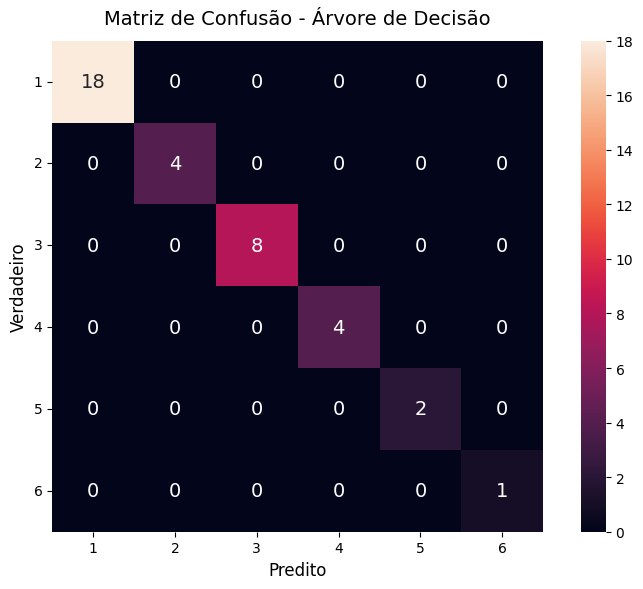

In [ ]:
# === Matriz de Confusão - Árvore de Decisão ===

# Predição no conjunto de teste
y_pred_dt = modelo_dt_otimizado.predict(X_teste)


# Cria matriz de confusão
matriz_conf_dt = confusion_matrix(y_teste, y_pred_dt, labels=ordem_labels)
df_conf_dt = pd.DataFrame(matriz_conf_dt, index=ordem_labels, columns=ordem_labels)

# Visualização com seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(df_conf_dt, annot=True, fmt="d",
            cbar=True, square=True, annot_kws={"size": 14})

plt.xlabel("Predito", fontsize=12)
plt.ylabel("Verdadeiro", fontsize=12)
plt.title("Matriz de Confusão - Árvore de Decisão", fontsize=14, pad=12)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


**Relatório de classificação**

In [ ]:
print("Relatório de Classificação - Árvore de Decisão\n")
print(classification_report(y_teste, y_pred_dt,digits=4))

Relatório de Classificação - Árvore de Decisão

              precision    recall  f1-score   support

           1     1.0000    1.0000    1.0000        18
           2     1.0000    1.0000    1.0000         4
           3     1.0000    1.0000    1.0000         8
           4     1.0000    1.0000    1.0000         4
           5     1.0000    1.0000    1.0000         2
           6     1.0000    1.0000    1.0000         1

    accuracy                         1.0000        37
   macro avg     1.0000    1.0000    1.0000        37
weighted avg     1.0000    1.0000    1.0000        37



## 10. Modelo *Random Forest Classifier* <a id="random-forest-classifier"></a>

### 10.1. Criação do Modelo

Nesta parte, é definida uma função de criação do modelo (`cria_modelo_rf`) para ser usada na otimização com o `optuna`.
A função permite ajustar automaticamente parâmetros importantes da Floresta Aleatória, como:

- `n_estimators`: número de árvores na floresta;

- `criterion`: função para medir a qualidade de uma divisão (gini ou entropy);

- `max_depth`: profundidade máxima de cada árvore;

- `min_samples_split`: número mínimo de amostras necessárias para dividir um nó interno;

- `min_samples_leaf`: número mínimo de amostras necessárias para estar em um nó folha.

Também são testadas duas opções de pré-processamento:

- Normalização dos dados (`StandardScaler`);

- Redução de dimensionalidade com PCA.

O modelo é estruturado em um *pipeline*, que combina essas etapas conforme definido pelos parâmetros escolhidos.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

def cria_modelo_rf(trial):
    """Cria instância da Floresta Aleatória com opções de normalização e PCA (para Optuna)."""
    
    parametros = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 500, log=True),
        "criterion": trial.suggest_categorical("criterion", ["gini", "entropy"]),
        "max_depth": trial.suggest_int("max_depth", 2, 20, log=True),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 20),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 10),
        "random_state": 42,
        "n_jobs": -1
    }
    
    normalizar = trial.suggest_categorical("normalizar", [True, False])
    usar_pca = trial.suggest_categorical("usar_pca", [True, False])
    
    # Se PCA for usado, define número de componentes
    if usar_pca:
        num_componentes = trial.suggest_int("n_componentes", 1, min(X_treino.shape[1], 20))
    else:
        num_componentes = None
    
    # Monta pipeline dinamicamente
    etapas = []
    if normalizar:
        etapas.append(("scaler", StandardScaler()))
    if usar_pca:
        etapas.append(("pca", PCA(n_components=num_componentes)))
    etapas.append(("rf", RandomForestClassifier(**parametros)))
    
    modelo = make_pipeline(*[etapa[1] for etapa in etapas])
    
    return modelo

### 10.2. Otimização

Aqui, aplicamos o `optuna` para otimizar os hiperparâmetros da Floresta Aleatória.

A função `otimizar_rf` realiza um processo iterativo de busca, avaliando múltiplas combinações de parâmetros com validação cruzada estratificada ($5$ *folds*).

O objetivo é maximizar a acurácia média, garantindo que o modelo final seja o mais eficiente possível.

Após o estudo, o notebook exibe os melhores parâmetros encontrados, que são então utilizados para reconstruir e treinar o modelo final otimizado (`modelo_rf_otimizado`).

In [ ]:
def otimizar_rf(trial):
    modelo = cria_modelo_rf(trial)
    # Usa StratifiedKFold para garantir que cada fold tenha a mesma proporção de classes
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    # Calcula a acurácia média da validação cruzada
    score = cross_val_score(modelo, X_treino, y_treino, cv=cv, scoring='accuracy', n_jobs=-1).mean()
    return score

study_rf = optuna.create_study(direction="maximize")
study_rf.optimize(otimizar_rf, n_trials=100, show_progress_bar=True)

melhores_params_rf = study_rf.best_params
melhor_score_rf = study_rf.best_value

print(f"Melhor Acurácia (CV): {melhor_score_rf:.4f}")
print("Melhores Hiperparâmetros (Floresta Aleatória):")
for param, value in melhores_params_rf.items():
    print(f"- {param}: {value}")

[I 2025-11-03 23:33:13,443] A new study created in memory with name: no-name-8793a638-9381-4267-bc06-812bdbd2e8aa


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2025-11-03 23:33:17,626] Trial 0 finished with value: 0.8965501165501166 and parameters: {'n_estimators': 97, 'criterion': 'gini', 'max_depth': 13, 'min_samples_split': 14, 'min_samples_leaf': 10, 'normalizar': False, 'usar_pca': True, 'n_componentes': 5}. Best is trial 0 with value: 0.8965501165501166.
[I 2025-11-03 23:33:20,820] Trial 1 finished with value: 0.9696037296037296 and parameters: {'n_estimators': 281, 'criterion': 'gini', 'max_depth': 19, 'min_samples_split': 3, 'min_samples_leaf': 10, 'normalizar': False, 'usar_pca': False}. Best is trial 1 with value: 0.9696037296037296.
[I 2025-11-03 23:33:23,810] Trial 2 finished with value: 0.9420979020979022 and parameters: {'n_estimators': 100, 'criterion': 'gini', 'max_depth': 14, 'min_samples_split': 14, 'min_samples_leaf': 9, 'normalizar': True, 'usar_pca': True, 'n_componentes': 8}. Best is trial 1 with value: 0.9696037296037296.
[I 2025-11-03 23:33:28,423] Trial 3 finished with value: 0.9514685314685316 and parameters: {'n_

### 10.3. Avaliação do Modelo

In [ ]:
# Monta o pipeline final com os melhores parâmetros
normalizar_rf = melhores_params_rf['normalizar']
usar_pca_rf = melhores_params_rf['usar_pca']
num_componentes_rf = melhores_params_rf.get('n_componentes', None)

etapas_finais_rf = []
if normalizar_rf:
    etapas_finais_rf.append(("scaler", StandardScaler()))
if usar_pca_rf and num_componentes_rf is not None:
    etapas_finais_rf.append(("pca", PCA(n_components=num_componentes_rf)))
etapas_finais_rf.append(("rf", RandomForestClassifier(
    n_estimators=melhores_params_rf['n_estimators'],
    criterion=melhores_params_rf['criterion'],
    max_depth=melhores_params_rf['max_depth'],
    min_samples_split=melhores_params_rf['min_samples_split'],
    min_samples_leaf=melhores_params_rf['min_samples_leaf'],
    random_state=42,
    n_jobs=-1
)))

modelo_rf_otimizado = make_pipeline(*[e[1] for e in etapas_finais_rf])
modelo_rf_otimizado.fit(X_treino, y_treino)

,steps,"[('randomforestclassifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,n_estimators,224
,criterion,'gini'
,max_depth,14
,min_samples_split,14
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'


**Matriz de Confusão**

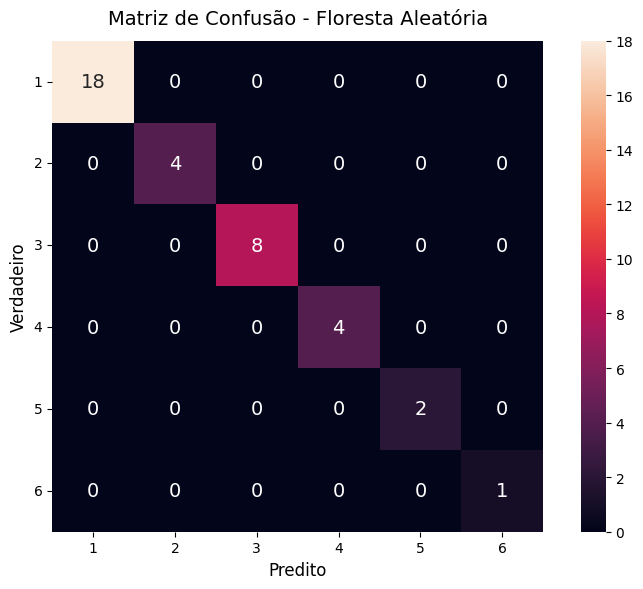

In [ ]:
# Predição no conjunto de teste
y_pred_rf = modelo_rf_otimizado.predict(X_teste)


# Cria matriz de confusão
matriz_conf_rf = confusion_matrix(y_teste, y_pred_rf, labels=ordem_labels)
df_conf_rf = pd.DataFrame(matriz_conf_rf, index=ordem_labels, columns=ordem_labels)

# Visualização com seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(df_conf_rf, annot=True, fmt="d",
            cbar=True, square=True, annot_kws={"size": 14})

plt.xlabel("Predito", fontsize=12)
plt.ylabel("Verdadeiro", fontsize=12)
plt.title("Matriz de Confusão - Floresta Aleatória", fontsize=14, pad=12)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


**Relatório de Classificação**

In [ ]:
print("Relatório de Classificação - Floresta Aleatória\n")
print(classification_report(y_teste, y_pred_rf,digits=4))

Relatório de Classificação - Floresta Aleatória

              precision    recall  f1-score   support

           1     1.0000    1.0000    1.0000        18
           2     1.0000    1.0000    1.0000         4
           3     1.0000    1.0000    1.0000         8
           4     1.0000    1.0000    1.0000         4
           5     1.0000    1.0000    1.0000         2
           6     1.0000    1.0000    1.0000         1

    accuracy                         1.0000        37
   macro avg     1.0000    1.0000    1.0000        37
weighted avg     1.0000    1.0000    1.0000        37



## 11. Modelo *Support Vector Machine*

O algoritmo Support Vector Machine (SVM), em especial sua implementação de classificação SVC (Support Vector Classifier), é um dos métodos mais robustos e amplamente utilizados em aprendizado supervisionado. Seu princípio é encontrar um hiperplano que melhor separa as classes no espaço de atributos, maximizando a margem entre os pontos de fronteira — os chamados vetores de suporte. Essa característica permite ao SVC lidar bem com dados de alta dimensionalidade e até com fronteiras não lineares, graças ao uso de funções kernel como RBF, polinomial e sigmoide.


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
import optuna
import pandas as pd

### 11.1 Definição da CV

Define-se a estratégia de validação cruzada estratificada (3 folds) para manter o balanceamento entre classes durante o processo de otimização.

In [ ]:
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

### 11.2 Função objetivo do Optuna

A função objective cria o pipeline e avalia cada combinação de hiperparâmetros C e γ proposta pelo Optuna.
O retorno é a média da acurácia obtida nas três divisões de validação.

In [ ]:
def objective(trial):
    C = trial.suggest_float("C", 1e-3, 1e3, log=True)
    gamma = trial.suggest_float("gamma", 1e-4, 1e1, log=True)

    pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("svc", SVC(kernel="rbf", C=C, gamma=gamma))
    ])

    scores = cross_val_score(pipe, X_treino, y_treino, cv=cv,
                             scoring="accuracy", n_jobs=-1)
    return scores.mean()

### 11.3 Execução da Otimização

Em seguida, o Optuna é executado para buscar a combinação de hiperparâmetros com melhor desempenho.
São realizadas 60 tentativas (trials), sendo o resultado médio da validação cruzada usado como métrica de comparação.

In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=60, show_progress_bar=False)

print("Melhores parâmetros:", study.best_params)
print("Acurácia CV (média 3-fold):", study.best_value)


[I 2025-11-03 23:22:28,140] A new study created in memory with name: no-name-119b47ef-3519-4876-a459-3c2ff156a5df
[I 2025-11-03 23:22:28,185] Trial 0 finished with value: 0.28571031415068115 and parameters: {'C': 0.04764662069162279, 'gamma': 0.0028712668963866233}. Best is trial 0 with value: 0.28571031415068115.
[I 2025-11-03 23:22:28,227] Trial 1 finished with value: 0.28571031415068115 and parameters: {'C': 0.04311799465256928, 'gamma': 6.96699655948743}. Best is trial 0 with value: 0.28571031415068115.
[I 2025-11-03 23:22:28,266] Trial 2 finished with value: 0.9665554628857382 and parameters: {'C': 3.021443492473083, 'gamma': 0.03002686736250446}. Best is trial 2 with value: 0.9665554628857382.
[I 2025-11-03 23:22:28,306] Trial 3 finished with value: 0.9634695579649709 and parameters: {'C': 139.23557600849307, 'gamma': 0.031541835738155825}. Best is trial 2 with value: 0.9665554628857382.
[I 2025-11-03 23:22:28,334] Trial 4 finished with value: 0.28571031415068115 and parameters: 

Melhores parâmetros: {'C': 3.021443492473083, 'gamma': 0.03002686736250446}
Acurácia CV (média 3-fold): 0.9665554628857382


### 11.4. Treino final e avaliação

Após definida a melhor configuração, o modelo é treinado em todo o conjunto de treino e avaliado no conjunto de teste (holdout).
São apresentados a acurácia final, a matriz de confusão e o relatório de desempenho por classe.

In [ ]:
best_C = study.best_params["C"]
best_gamma = study.best_params["gamma"]

final_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC(kernel="rbf", C=best_C, gamma=best_gamma))
])

final_pipe.fit(X_treino, y_treino)


test_acc = final_pipe.score(X_teste, y_teste)
print("Acurácia no conjunto de teste (holdout):", test_acc)

y_pred_svm = final_pipe.predict(X_teste)


Acurácia no conjunto de teste (holdout): 1.0


**Matriz de confusão**

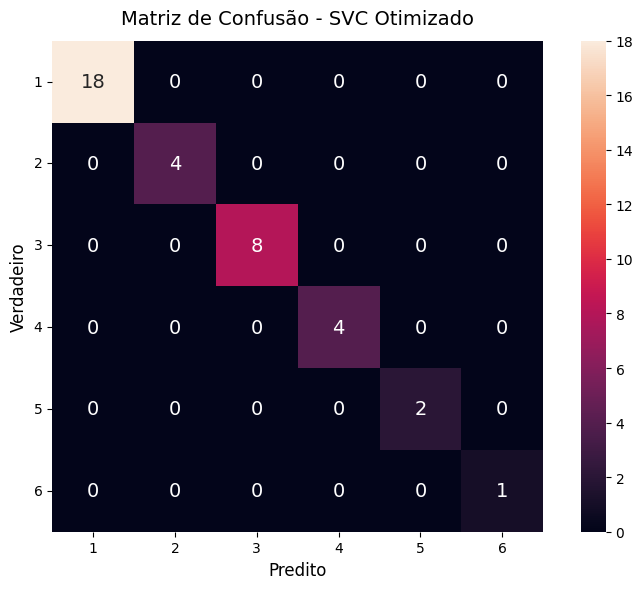

In [ ]:
y_pred_svm = final_pipe.predict(X_teste)

# ordem_labels = np.unique(y_teste)
matriz_conf = confusion_matrix(y_teste, y_pred_svm, labels=ordem_labels)

df_conf = pd.DataFrame(matriz_conf, index=ordem_labels, columns=ordem_labels)


plt.figure(figsize=(8, 6))
sns.heatmap(df_conf, annot=True, fmt="d",
            cbar=True, square=True, annot_kws={"size": 14})

plt.xlabel("Predito", fontsize=12)
plt.ylabel("Verdadeiro", fontsize=12)
plt.title("Matriz de Confusão - SVC Otimizado", fontsize=14, pad=12)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**Relatório de Classificação**

In [ ]:
print("\nRelatório de classificação:\n", classification_report(y_teste, y_pred_svm, digits=4))


Relatório de classificação:
               precision    recall  f1-score   support

           1     1.0000    1.0000    1.0000        18
           2     1.0000    1.0000    1.0000         4
           3     1.0000    1.0000    1.0000         8
           4     1.0000    1.0000    1.0000         4
           5     1.0000    1.0000    1.0000         2
           6     1.0000    1.0000    1.0000         1

    accuracy                         1.0000        37
   macro avg     1.0000    1.0000    1.0000        37
weighted avg     1.0000    1.0000    1.0000        37



### 11.5 Atributos Mais Importantes do SVC

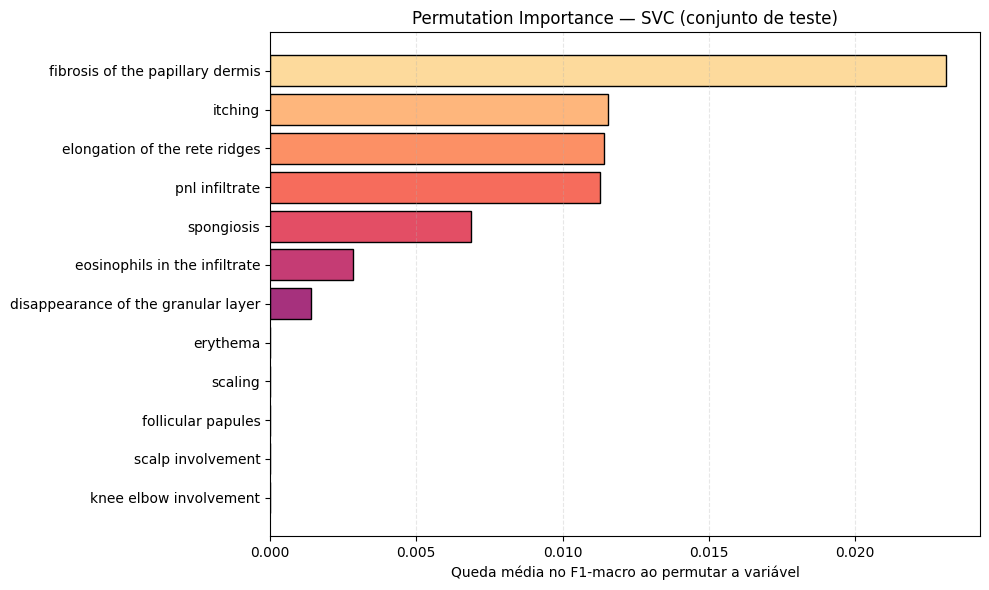

In [ ]:
# 1) Calcula o permutation importance no conjunto de teste
pi = permutation_importance(
    estimator=final_pipe,
    X=X_teste,
    y=y_teste,
    scoring="f1_macro",
    n_repeats=30,
    random_state=777666,
    n_jobs=-1
)


df_pi_svc = pd.DataFrame({
    "Variável": X.columns,
    "Importância Média": pi.importances_mean
}).sort_values("Importância Média", ascending=False)


top = df_pi_svc.head(12).iloc[::-1].reset_index(drop=True)


fig, ax = plt.subplots(figsize=(10, 6))
y = np.arange(len(top))

colors = sns.color_palette("magma", len(top))

ax.barh(y, top["Importância Média"], color=colors, edgecolor="black")
ax.set_yticks(y)
ax.set_yticklabels(top["Variável"])

ax.set_xlabel("Queda média no F1-macro ao permutar a variável")
ax.set_title("Permutation Importance — SVC (conjunto de teste)")
ax.grid(axis="x", linestyle="--", alpha=0.3)

plt.tight_layout()
plt.show()

## 12. Modelo *Voting Feature Intervals*

O modelo *Voting Feature Intervals* (VFI5) é um algoritmo de classificação supervisionada que funciona com base na ideia de que, para cada classe do *target* e para cada atributo, é possível definir um intervalo de valores representativos observados nos dados de treinamento.

Ao classificar uma nova amostra:

**1°** Cada atributo verifica em quais intervalos de classe seu valor se encaixa.  
**2°** Cada encaixe “vota” na classe correspondente.  
**3°** A classe com mais votos é escolhida como previsão final.  
**4°** Em caso de empate, critérios adicionais como distância ao centro do intervalo da classe ou KNN local podem ser usados para desempatar.

**Exemplo Prático**
> 
>  
> Suponha um problema de diagnóstico médico com duas classes: $A$ (saudável) e $B$ (disfunção metabólica), e dois atributos: `Glicose` e `Pressão`.
>
> | Paciente | Glicose | Pressão | Classe   |
> | -------- | ------- | ------- | -------- |
> | $P1$     | $85$    | $120$   | $A$      |
> | $P2$     | $90$    | $110$   | $A$      |
> | $P3$     | $88$    | $125$   | $A$      |
> | $P4$     | $150$   | $140$   | $B$      |
> | $P5$     | $160$   | $130$   | $B$      |
> | $P6$     | $155$   | $145$   | $B$      |
>
> *Intervalos calculados pelo VFI5:*
>
> | Classe | Glicose     | Pressão     |
> | ------ | ----------- | ----------- |
> | $A$    | [85, 90]    | [110,125]   |
> | $B$    | [150,160]   | [130,145]   |
>
> *Classificação de um novo paciente:*
>
> * Valores: 
>   - `Glicose` = 89
>   - `Pressão` = 140
>
> * Votos:
>   * `Glicose`: pertence a $A$ → $A$ recebe 1 voto
>   * `Pressão`: pertence a $B$ → $B$ recebe 1 voto
>
> * Empate: desempate pela distância ao centro dos intervalos → resultado: **Classe A (saudável)**  
>  $\quad$

**Observação**: parte do código do VFI que será apresentado foi desenvolvida com auxílio de Inteligência Artificial, uma vez que envolve conceitos de Programação Orientada a Objetos (POO), como a criação de classes, que ainda não foram formalmente apresentados no curso.

### 12.1. Criação do Modelo

Nesta etapa, implementamos o modelo *Voting Feature Intervals* (VFI5) em Python.
O código define:

- Uma função de ajuste (`vfi5`) que constrói intervalos e distribuições de votos;

- Uma função de predição (`vfi5_predict`) que realiza a votação entre classes;

- Uma classe compatível com o `scikit-learn` (`VFIClassifier`), herdando de `BaseEstimator` e `ClassifierMixin`.

Essas duas classes do `sklearn` são interfaces base que padronizam o comportamento de modelos personalizados, permitindo que o VFI seja usado com funções como `fit()`, `predict()`, `cross_val_score()` e `optuna` para otimização.

In [ ]:
from collections import defaultdict
import numpy as np

def vfi5(X: pd.DataFrame, y: pd.Series, num_intervalos=5, suavizacao=0.0):
    classes = np.unique(y)
    atributos = X.columns
    contagem_classes = y.value_counts().to_dict()

    intervalos = {}
    votos_por_intervalo = {}

    for atributo in atributos:
        intervalos[atributo] = []

        if np.issubdtype(X[atributo].dtype, np.number):
            # Criar intervalos numéricos igualmente espaçados
            valor_min, valor_max = X[atributo].min(), X[atributo].max()
            limites = np.linspace(valor_min, valor_max, num_intervalos + 1)
            intervalos[atributo] = [(limites[i], limites[i+1]) for i in range(len(limites)-1)]
        else:
            valores_unicos = X[atributo].unique()
            intervalos[atributo] = [(v, v) for v in valores_unicos]

        votos_por_intervalo[atributo] = defaultdict(lambda: defaultdict(float))

        # Contar instâncias por intervalo e classe
        for i, (baixo, alto) in enumerate(intervalos[atributo]):
            for classe in classes:
                if np.issubdtype(X[atributo].dtype, np.number):
                    mascara = (X[atributo] >= baixo) & (X[atributo] < alto)
                else:
                    mascara = X[atributo] == baixo
                contagem = np.sum(mascara & (y == classe)) + suavizacao  # suavização
                votos_por_intervalo[atributo][i][classe] = contagem / (contagem_classes[classe] + suavizacao * len(intervalos[atributo]))

        # Normalizar votos
        for i in votos_por_intervalo[atributo]:
            total = sum(votos_por_intervalo[atributo][i].values())
            if total > 0:
                for classe in classes:
                    votos_por_intervalo[atributo][i][classe] /= total

    return intervalos, votos_por_intervalo, classes, atributos

**Função de Predição**

In [ ]:
def vfi5_predict(X: pd.DataFrame, intervalos, votos_por_intervalos, classes, atributos, pesos_atributos=None):
    previsoes = []
    if pesos_atributos is None:
        pesos_atributos = {atributo: 1.0 for atributo in atributos}

    for _, linha in X.iterrows():
        votos_classe = defaultdict(float)

        for atributo in atributos:
            valor = linha[atributo]
            for i, (baixo, alto) in enumerate(intervalos[atributo]):
                if np.issubdtype(type(valor), np.number):
                    if baixo <= valor < alto:
                        for classe in classes:
                            votos_classe[classe] += votos_por_intervalos[atributo][i][classe] * pesos_atributos[atributo]
                        break
                else:
                    if valor == baixo:
                        for classe in classes:
                            votos_classe[classe] += votos_por_intervalos[atributo][i][classe] * pesos_atributos[atributo]
                        break
        previsoes.append(max(votos_classe, key=votos_classe.get))
    return np.array(previsoes)
                    

**Classe Compatível com `sklearn`**

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin

class VFIClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, num_intervalos=5, suavizacao=0.0):
        self.num_intervalos = num_intervalos
        self.suavizacao = suavizacao

    def fit(self, X, y):
        self.intervalos, self.votos, self.classes, self.atributos = vfi5(
            X, y, num_intervalos=self.num_intervalos, suavizacao=self.suavizacao)
        return self

    def predict(self, X):
        return vfi5_predict(X, self.intervalos, self.votos, self.classes, self.atributos)

### 12.2. Otimização

O modelo é otimizado com `optuna`, buscando os melhores valores para:

- `num_intervalos`: número de divisões em cada atributo;

- `suavizacao`: fator que evita contagens nulas.

A otimização é feita com validação cruzada estratificada ($5$ *folds*), maximizando a acurácia média.

Os melhores parâmetros são exibidos e usados para treinar o modelo final.

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
import optuna

def otimizar_vfi(X, y, n_trials=50):
    def objetivo(trial):
        num_intervalos = trial.suggest_int('num_intervalos', 2, 20)
        suavizacao = trial.suggest_float('suavizacao', 0.0, 1.0)

        modelo = VFIClassifier(num_intervalos=num_intervalos, suavizacao=suavizacao)
        validacao_cruzada = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEMENTE_ALEATORIA)
        pontuacoes = cross_val_score(modelo, X, y, cv=validacao_cruzada, scoring='accuracy')
        return pontuacoes.mean()

    estudo = optuna.create_study(direction='maximize')
    estudo.optimize(objetivo, n_trials=n_trials)

    print("Melhor resultado:", estudo.best_value)
    print("Melhores hiperparâmetros:", estudo.best_params)
    return estudo.best_params

melhores_params = otimizar_vfi(X_treino, y_treino, n_trials=30)

[I 2025-11-03 23:20:25,445] A new study created in memory with name: no-name-d13698ef-93c5-47e0-a198-99e3c1a5b065
[I 2025-11-03 23:20:26,816] Trial 0 finished with value: 0.9573892773892775 and parameters: {'num_intervalos': 5, 'suavizacao': 0.2883769999388307}. Best is trial 0 with value: 0.9573892773892775.
[I 2025-11-03 23:20:30,628] Trial 1 finished with value: 0.9573892773892775 and parameters: {'num_intervalos': 18, 'suavizacao': 0.299577835367835}. Best is trial 0 with value: 0.9573892773892775.
[I 2025-11-03 23:20:32,976] Trial 2 finished with value: 0.9604195804195804 and parameters: {'num_intervalos': 11, 'suavizacao': 0.4799860185398802}. Best is trial 2 with value: 0.9604195804195804.
[I 2025-11-03 23:20:36,125] Trial 3 finished with value: 0.9543123543123544 and parameters: {'num_intervalos': 14, 'suavizacao': 0.5100104459269432}. Best is trial 2 with value: 0.9604195804195804.
[I 2025-11-03 23:20:36,624] Trial 4 finished with value: 0.8934265734265734 and parameters: {'nu

Melhor resultado: 0.9695104895104896
Melhores hiperparâmetros: {'num_intervalos': 16, 'suavizacao': 0.12304248759101166}


### 12.3. Avaliação do Modelo

Após o treinamento do modelo otimizado, avaliamos seu desempenho:

In [ ]:
modelo_vfi = VFIClassifier(**melhores_params)
modelo_vfi.fit(X_treino, y_treino)

y_pred = modelo_vfi.predict(X_teste)

**Matriz Confusão**

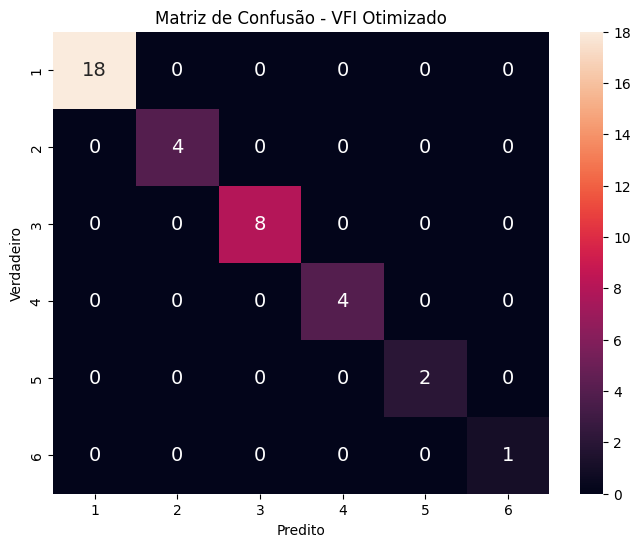

In [ ]:

matriz_conf = confusion_matrix(y_teste, y_pred, labels=ordem_labels)

df_conf = pd.DataFrame(matriz_conf, index=ordem_labels, columns=ordem_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(df_conf, annot=True, fmt='d', annot_kws={"size": 14})
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.title("Matriz de Confusão - VFI Otimizado")
plt.show()

**Relatório de Classificação**

In [ ]:
print(classification_report(y_teste, y_pred, target_names=[str(c) for c in ordem_labels]))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         1

    accuracy                           1.00        37
   macro avg       1.00      1.00      1.00        37
weighted avg       1.00      1.00      1.00        37



### 12.4. Features Mais Importantes do VFI

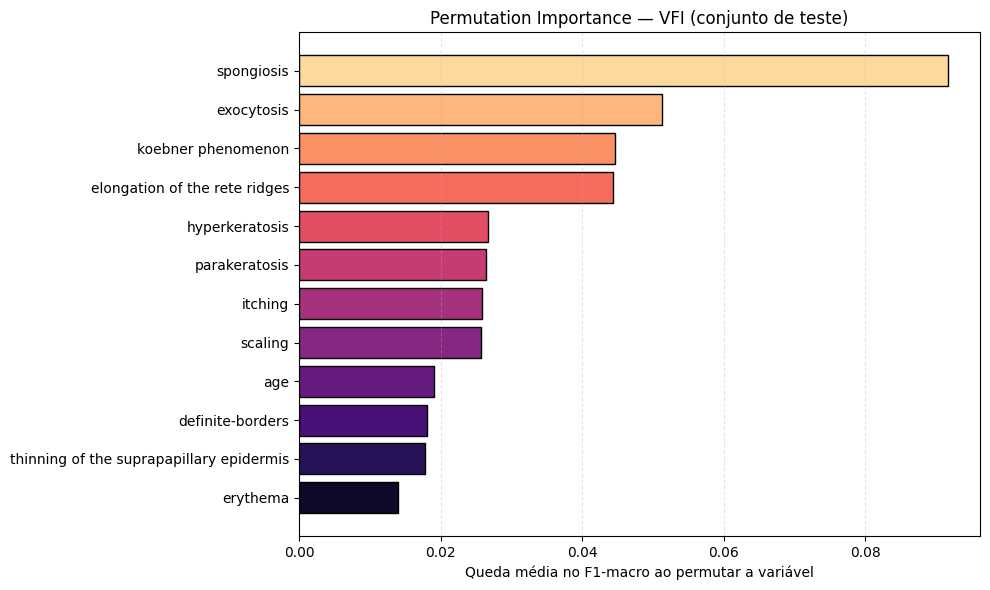

In [ ]:

pi = permutation_importance(
    estimator=modelo_vfi,
    X=X_teste,
    y=y_teste,
    scoring="f1_macro",
    n_repeats=30,
    random_state=777666,
    n_jobs=-1
)


df_pi_vfi = pd.DataFrame({
    "Variável": X.columns,
    "Importância Média": pi.importances_mean
}).sort_values("Importância Média", ascending=False)


top = df_pi_vfi.head(12).iloc[::-1].reset_index(drop=True)


fig, ax = plt.subplots(figsize=(10, 6))
y = np.arange(len(top))

colors = sns.color_palette("magma", len(top))

ax.barh(y, top["Importância Média"], color=colors, edgecolor="black")
ax.set_yticks(y)
ax.set_yticklabels(top["Variável"])

ax.set_xlabel("Queda média no F1-macro ao permutar a variável")
ax.set_title("Permutation Importance — VFI (conjunto de teste)")
ax.grid(axis="x", linestyle="--", alpha=0.3)

plt.tight_layout()
plt.show()

Nota-se que `fibrosis of the papillary dermis` é a mais determinante, pois sua permutação provoca a maior perda de desempenho do VFI. Em seguida vêm `thinning of the suprapapillary epidermis` e `elongation of the rete ridges`, também com impacto relevante, indicando que alterações estruturais da epiderme/derme são chaves para a decisão do modelo. Variáveis como `scaling`, `erythema` e `spongiosis` exibem efeito intermediário, enquanto `eosinophils in the infiltrate`, `focal hypergranulosis` e `vacuolisation and damage of the basal layer` têm contribuição pequena, sugerindo baixa influência nas previsões do VFI.

## 13. Conclusão

O presente estudo demonstrou o potencial do aprendizado de máquina como ferramenta de apoio ao diagnóstico diferencial de doenças eritemato-escamosas. Por meio da aplicação de diversos modelos — *Baseline*, K-Neighbors Classifier (KNN), Decision Tree, Random Forest, Support Vector Machine (SVC) e Voting Feature Intervals (VFI5) — foi possível comparar a performance preditiva e a interpretabilidade de cada abordagem.

Os resultados indicam que os modelos baseados em aprendizado supervisionado apresentaram desempenho superior ao *baseline*, com destaque para o SVC, VFI5, Random Forest e Decision Tree, que alcançaram métricas semelhantes de acurácia e F1-macro. A análise de *Permutation Importance* revelou quais características clínicas e histopatológicas têm maior influência na classificação, destacando, por exemplo, `fibrosis of the papillary dermis`, `thinning of the suprapapillary epidermis` e `elongation of the rete ridges` como variáveis cruciais para o diagnóstico.

O modelo VFI5, recomendado por estudos para problemas de classificação de doenças com atributos clínicos complexos, mostrou-se particularmente interessante por combinar alto desempenho com boa interpretabilidade, permitindo a definição de intervalos por classe que podem auxiliar na tomada de decisão clínica.

Em resumo, o estudo reforça que, com a correta preparação dos dados, otimização de hiperparâmetros e avaliação criteriosa, o aprendizado de máquina pode se tornar uma ferramenta complementar poderosa no diagnóstico médico, contribuindo para decisões mais rápidas, precisas e fundamentadas em evidências.



## 14. Contribuidores

- João Gabriel Lima Marengo  
- Lázaro Santana Ribeiro  
- Victor Emanuel Ruas Lima

## 15. Professor Responsável

### Daniel Roberto Cassar

Doutorado: Ciência e Engenharia de Materiais (UFSCar) - Pós-doutorado: UFSCar. Área de atuação: Informática de materiais.

## 16. Referências

- CASSAR, Daniel Roberto. Dados sintéticos e pipeline. Jupyter Notebook, Escola de Ciência Ilum, 2025. Acesso em: 20 out. 2025.

- CASSAR, Daniel Roberto. Otimização de hiperparâmetros com optuna. Jupyter Notebook, Escola de Ciência Ilum, 2025. Acesso em: 20 out. 2025.

- CASSAR, Daniel Roberto. Redução de dimensionalidade com PCA. Jupyter Notebook, Escola de Ciência Ilum, 2025. Acesso em: 20 out. 2025.

- CASSAR, Daniel Roberto. Validação cruzada e otimização de hiperparâmetros. Jupyter Notebook, Escola de Ciência Ilum, 2025. Acesso em: 20 out. 2025.

- GÜVENIR, H. Altay et al. Learning differential diagnosis of erythemato-squamous diseases using voting feature intervals. Artificial Intelligence in Medicine, v. 13, n. 3, p. 147-165, 1998.

- ILTER, N.; GÜVENIR, H. Dermatology [conjunto de dados]. UCI Machine Learning Repository, 1998. Disponível em: https://doi.org/10.24432/C5FK5P. Acesso em: 20 out. 2025.

- RYAN & MATT DATA SCIENCE. Mastering Hyperparameter Tuning with Optuna: Boost Your Machine Learning Models! [vídeo]. YouTube, 2023. Disponível em: https://www.youtube.com/watch?v=t-INgABWULw&t=911s
. Acesso em: 28 out. 2025.